In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath(".."))
from src.data.check_data import check_data_types, check_for_duplicates, check_data_distribution, check_missing_values, check_categorical_data_distribution, check_data_skew_and_kurt, check_for_outliers, check_correlation
from src.utils.visualization import plot_correlation_matrix, plot_count_plot, plot_cat_plot, plot_violin_plot, plot_histogram

## First look at the data

In [2]:
test_df = pd.read_csv('../data/raw/test.csv')
train_df = pd.read_csv('../data/raw/train.csv')

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature types

**Categorical features:**
- Sex
- Embarked
- Cabin
- Ticket
- Name

**Ordinal features:**
- Pclass

**Numerical features:**
- Age
- Fare
- SibSp
- Parch

In [5]:
check_data_types(train_df)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Missing values

In [6]:
check_missing_values(train_df)

,Missing Values,Missing Percent
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [7]:
check_missing_values(test_df)

,Missing Values,Missing Percent
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


## Duplicates

In [8]:
check_for_duplicates(train_df)

0

In [9]:
check_for_duplicates(test_df)

0

## Distribution of features

### Numerical

- 38% of samples survived
- more than 75% of samples did not travel with parents or children

In [10]:
check_data_distribution(train_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
check_data_skew_and_kurt(train_df)

,Skew,Kurtosis
PassengerId,0.000000,-1.200000
Survived,0.478523,-1.775005
Pclass,-0.630548,-1.280015
Age,0.389108,0.178274
SibSp,3.695352,17.880420
Parch,2.749117,9.778125
Fare,4.787317,33.398141


### Categorical

- 65% males
- Ticket: 24% repeating values
- Cabin 28% repeating values
- 72% of samples Embarked on S

In [12]:
check_categorical_data_distribution(train_df)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Plots

#### Sex

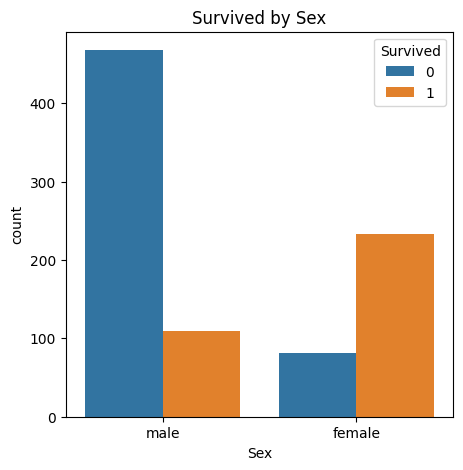

In [13]:
plot_count_plot(train_df, 'Sex', 'Survived', 'Survived by Sex')

#### Pclass

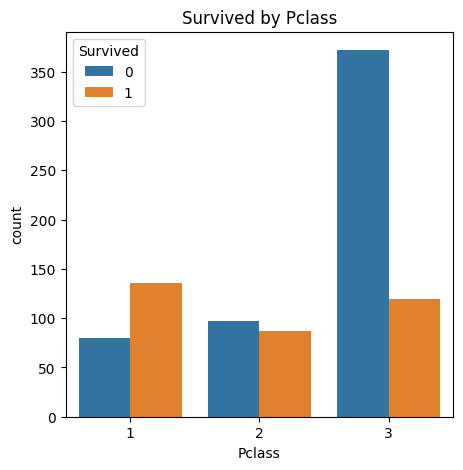

In [14]:
plot_count_plot(train_df, 'Pclass', 'Survived', 'Survived by Pclass')

#### Age

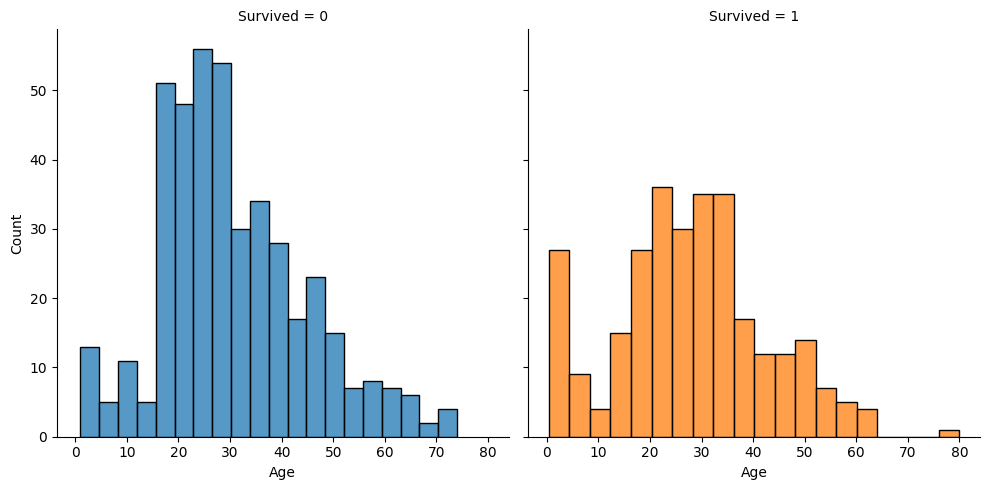

In [15]:
plot_histogram(train_df, 'Age', 'Survived', 'Survived by Age')

#### Embarked

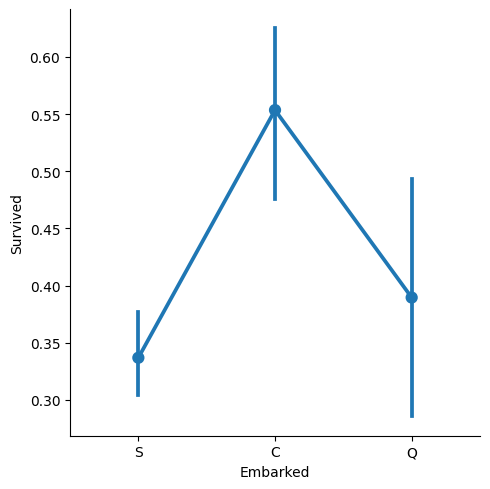

In [16]:
plot_cat_plot(train_df, 'Embarked', 'Survived')

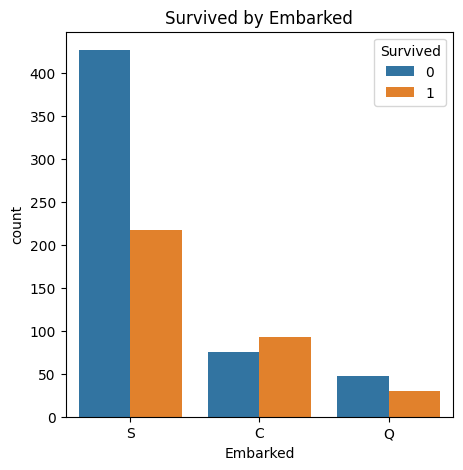

In [17]:
plot_count_plot(train_df, 'Embarked', 'Survived', 'Survived by Embarked')

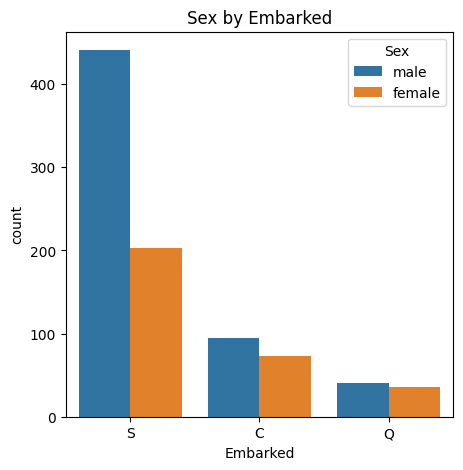

In [18]:
plot_count_plot(train_df, 'Embarked', 'Sex', 'Sex by Embarked')

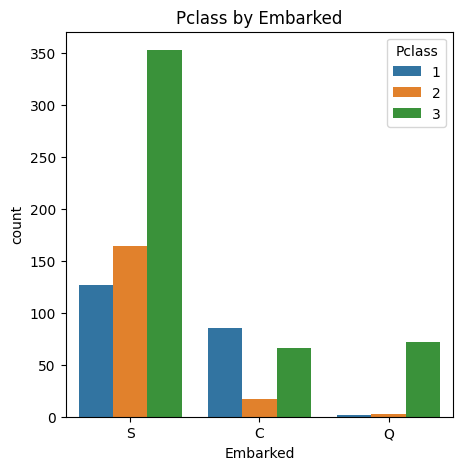

In [19]:
plot_count_plot(train_df, 'Embarked', 'Pclass', 'Pclass by Embarked')

#### SibSp

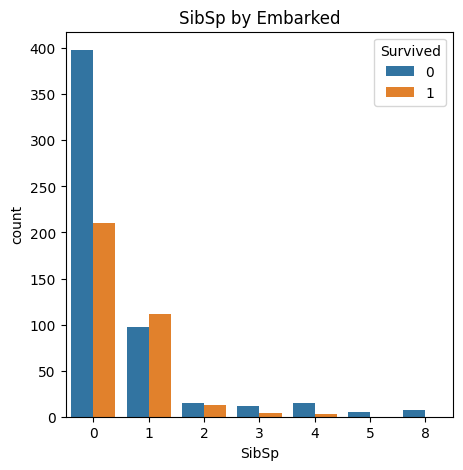

In [20]:
plot_count_plot(train_df, 'SibSp', 'Survived', 'SibSp by Embarked')

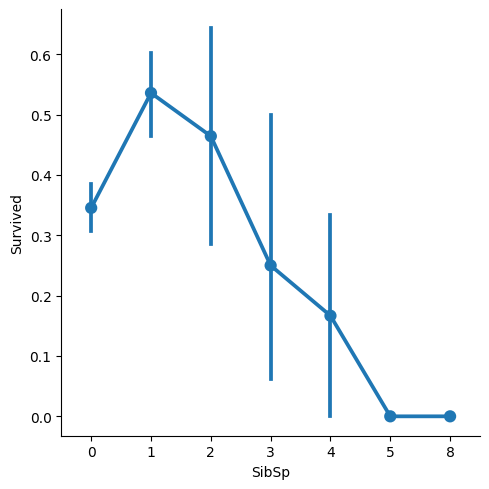

In [21]:
plot_cat_plot(train_df, 'SibSp', 'Survived')

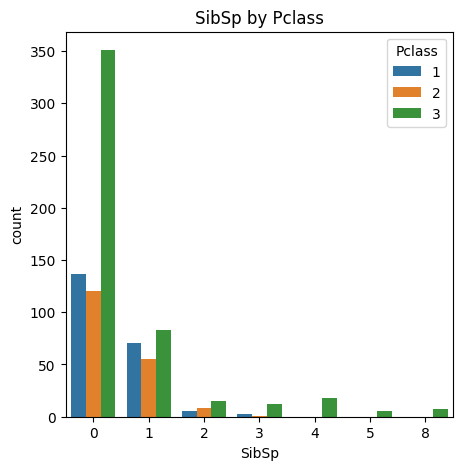

In [22]:
plot_count_plot(train_df, 'SibSp', 'Pclass', 'SibSp by Pclass')

#### Parch

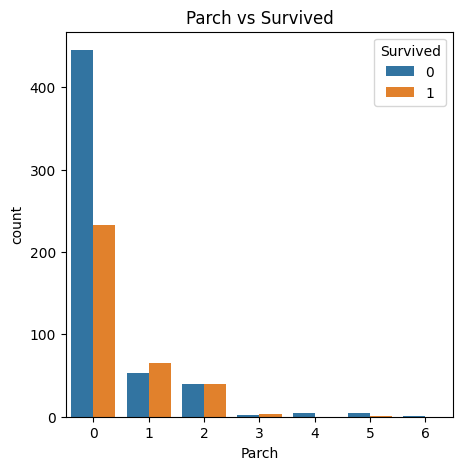

In [23]:
plot_count_plot(train_df, 'Parch', 'Survived', 'Parch vs Survived')

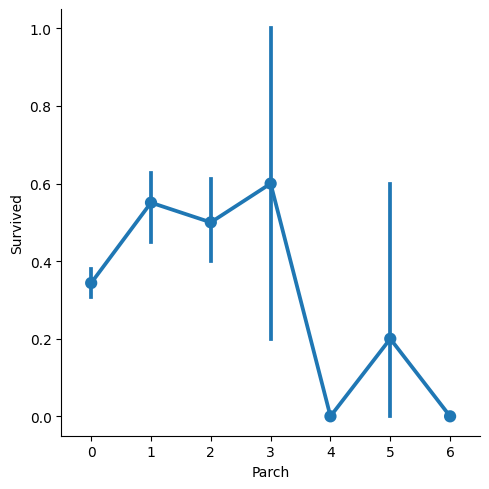

In [24]:
plot_cat_plot(train_df, 'Parch', 'Survived')

#### Fare

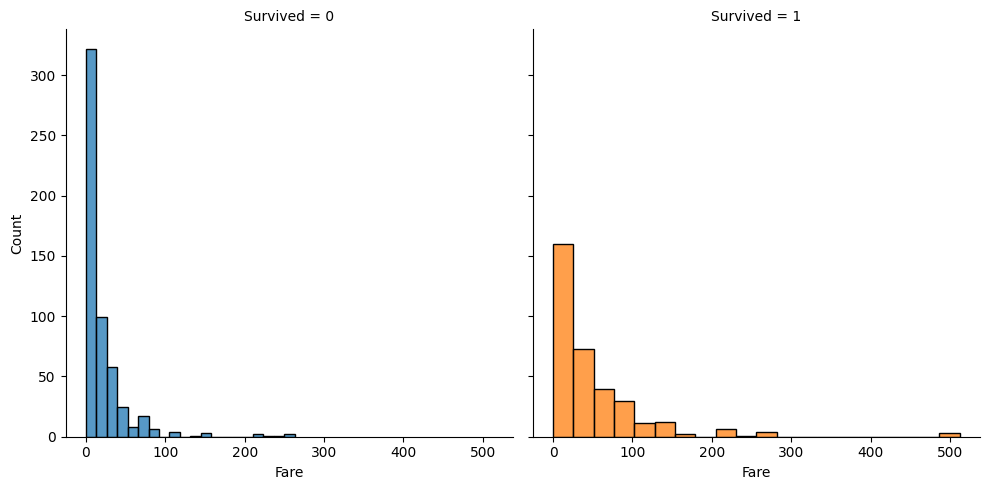

In [25]:
plot_histogram(train_df, 'Fare', 'Survived', 'Fare vs Survived')

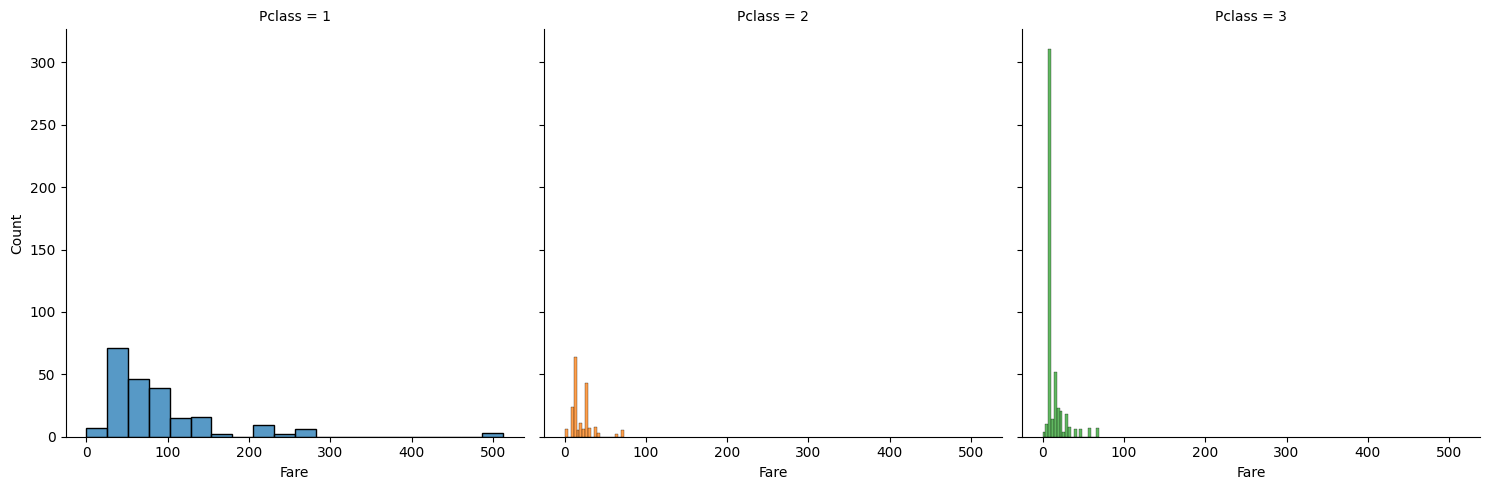

In [26]:
plot_histogram(train_df, 'Fare', 'Pclass', 'Fare and Pclass')

#### Pclass + Embarked

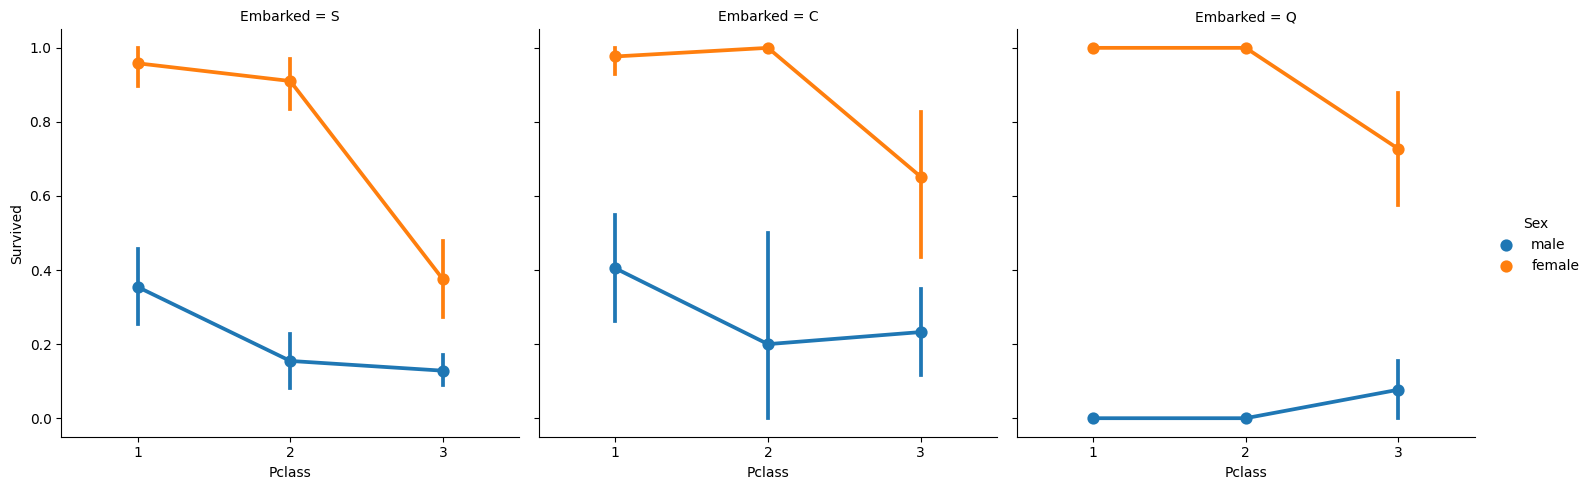

In [27]:
plot_cat_plot(train_df, 'Pclass', 'Survived', 'Sex', 'Embarked')

#### Sex + Pclass

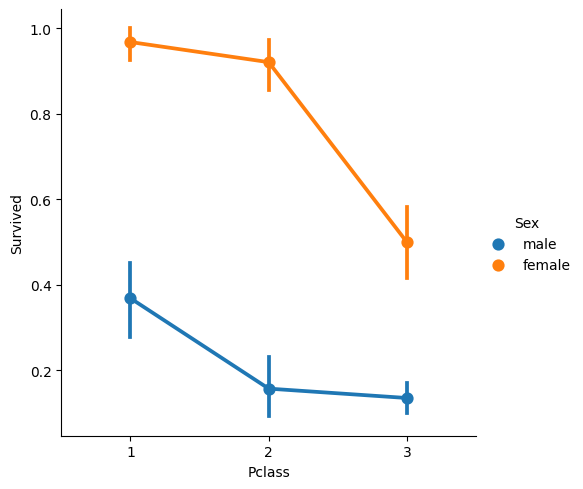

In [29]:
plot_cat_plot(train_df, 'Pclass', 'Survived', 'Sex')

#### Age + Pclass

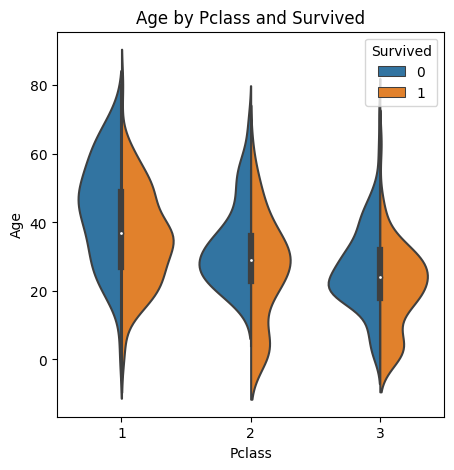

In [ ]:
plot_violin_plot(train_df, 'Pclass', 'Age', 'Survived', 'Age by Pclass and Survived')

#### Age + Sex

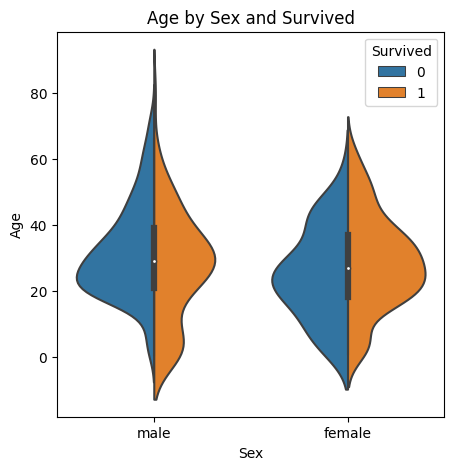

In [ ]:
plot_violin_plot(train_df, 'Sex','Age', 'Survived', 'Age by Sex and Survived')

## Outliers

<Axes: >

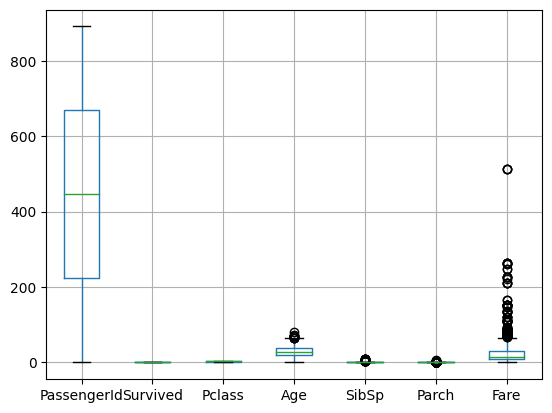

In [ ]:
check_for_outliers(train_df)

## Correlation

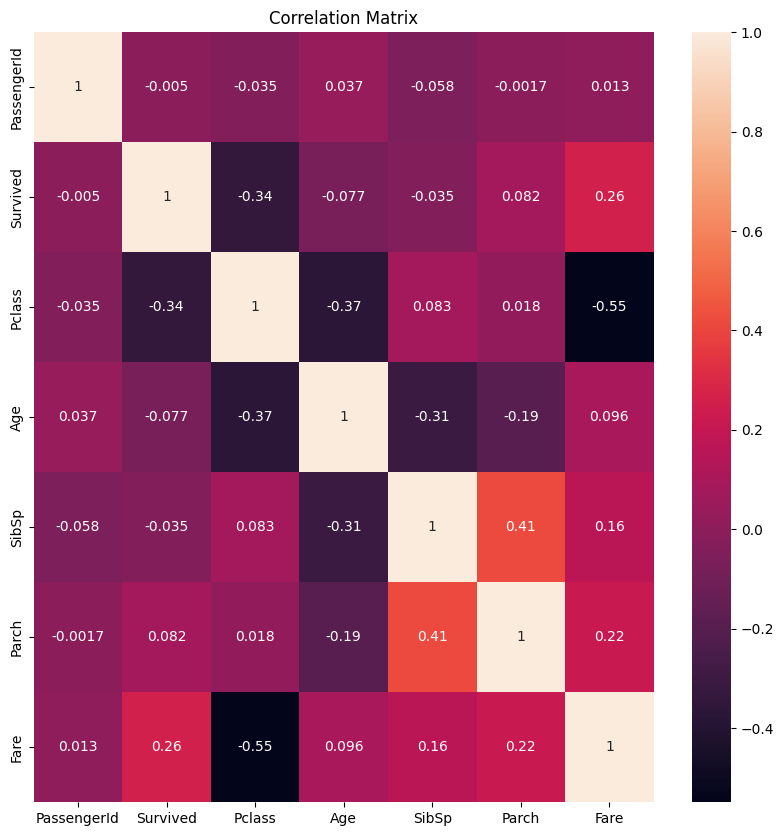

In [ ]:
corr = check_correlation(train_df)
plot_correlation_matrix(corr, 'Correlation Matrix')